<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Mexico_Outliers_y_Categorizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import ast

In [2]:
# Leer la base de la ciudad de Ottawa limpia
df = pd.read_csv("Mexico_sin_nulos.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,3,0.41,11.0
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,1,1.13,14.0
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,5.0,5.0,5.0,5.0,5.0,4.0,0,13,0.42,14.0
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,5.0,5.0,5.0,5.0,4.0,5.0,1,1,1.19,11.0
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,0.32,13.0
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,3,3.85,11.0


In [3]:
#Comprobamos nulos
df.isnull().sum().sum()

0

In [4]:
# Vemos la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    26536 non-null  object 
 1   source                          26536 non-null  object 
 2   host_name                       26536 non-null  object 
 3   host_response_time              26536 non-null  object 
 4   host_verifications              26536 non-null  object 
 5   neighbourhood_cleansed          26536 non-null  object 
 6   property_type                   26536 non-null  object 
 7   room_type                       26536 non-null  object 
 8   bathrooms_text                  26536 non-null  object 
 9   amenities                       26536 non-null  object 
 10  calendar_last_scraped           26536 non-null  object 
 11  host_id                         26536 non-null  int64  
 12  host_since                      

## Primeras transformaciones

In [5]:
# Conteo para la variable "amenities" y "host_verifications"
df['amenities_num'] = df['amenities'].apply(ast.literal_eval)
df["host_verifications_num"] = df['host_verifications'].apply(ast.literal_eval)
# Crear una nueva columna que cuenta los elementos de la lista
df['amenities_num'] = df['amenities_num'].apply(len)
df['host_verifications_num'] = df['host_verifications_num'].apply(len)

In [6]:
#Comprobación rápida de "amenities"
dfWhere = df[["amenities","amenities_num"]]
dfWhere
dfWhere[dfWhere["amenities_num"] == 2]
dfWhere[dfWhere["amenities_num"] == 0]

,amenities,amenities_num
190,[],0
206,[],0
509,[],0
541,[],0
721,[],0
796,[],0
1194,[],0
1195,[],0
1508,[],0
1611,[],0


In [7]:
#Comprobación rápida de "host_verifications"
dfWhere1 = df[["host_verifications","host_verifications_num"]]
dfWhere1
dfWhere1[dfWhere1["host_verifications_num"] == 2]
dfWhere1[dfWhere1["host_verifications_num"] == 0]

,host_verifications,host_verifications_num
679,[],0
734,[],0
807,[],0
1413,[],0
1519,[],0
1547,[],0
5915,[],0
6223,[],0
6615,[],0
6868,[],0


## Separar el dataframe en tipos de datos

In [8]:
# Separamos los datos cuantitativos
cuantitativas = df.select_dtypes(np.number)
cuantitativas

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,amenities_num,host_verifications_num
0,4796027,2013,100.0,88.0,1.0,3,6,1,1,19.420630,...,5.0,5.0,5.0,5.0,0,3,0.41,11.0,56,2
1,153786,2010,0.0,89.8,0.0,1,1,1,1,19.382830,...,5.0,5.0,5.0,5.0,0,1,1.13,14.0,12,3
2,196253,2010,100.0,92.0,1.0,17,17,1,1,19.411620,...,5.0,5.0,5.0,4.0,0,13,0.42,14.0,26,3
3,4647293,2013,100.0,96.0,1.0,1,4,1,1,19.439560,...,5.0,5.0,4.0,5.0,1,1,1.19,11.0,36,2
4,334451,2011,89.0,62.0,1.0,3,4,1,1,19.411520,...,5.0,5.0,5.0,5.0,0,2,0.32,13.0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13,15,1,1,19.404546,...,5.0,5.0,5.0,5.0,1,8,1.13,10.0,31,2
26532,7681206,2013,97.0,91.0,0.0,33,51,1,1,19.420567,...,5.0,5.0,5.0,5.0,0,11,1.13,11.0,48,2
26533,50951150,2015,100.0,100.0,2.0,12,15,1,1,19.408648,...,5.0,5.0,5.0,5.0,0,1,1.13,9.0,39,3
26534,147254250,2017,100.0,100.0,1.0,3,3,1,1,19.412367,...,5.0,5.0,5.0,5.0,0,3,1.13,7.0,10,2


In [9]:
# Separamos los datos cualitativos
cualitativas = df.select_dtypes(include=['object'])
cualitativas

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,calendar_last_scraped
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",2024-06-28
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",2024-06-27
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",2024-06-28
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",2024-06-28
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",2024-06-28
...,...,...,...,...,...,...,...,...,...,...,...
26531,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,4.5 baths,"[""Wifi"", ""Smoke alarm"", ""Essentials"", ""Room-da...",2024-06-28
26532,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Outdoor furniture"", ""Portable fans"",...",2024-06-28
26533,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Smoke alarm"", ""Wine glasses"", ""Essen...",2024-06-28
26534,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,1.5 baths,"[""Washer"", ""Wifi"", ""Exterior security cameras ...",2024-06-28


## Diagramas de caja



<Figure size 1500x800 with 0 Axes>

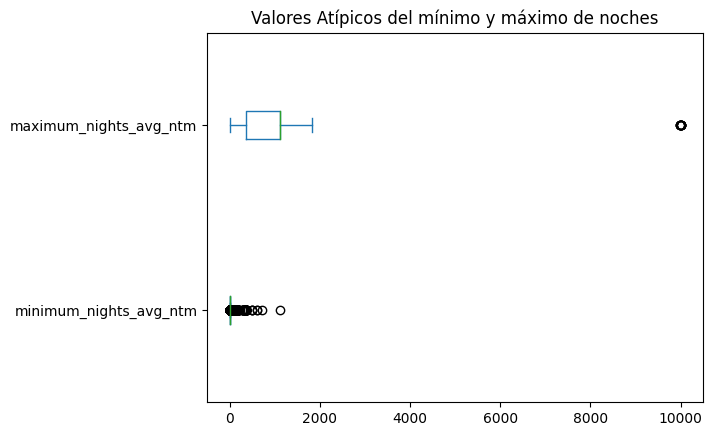

In [10]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfnights = cuantitativas.loc[:, cuantitativas.columns.str.contains("nights")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfnights.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del mínimo y máximo de noches")
plt.show() #Se muestra el diagrama

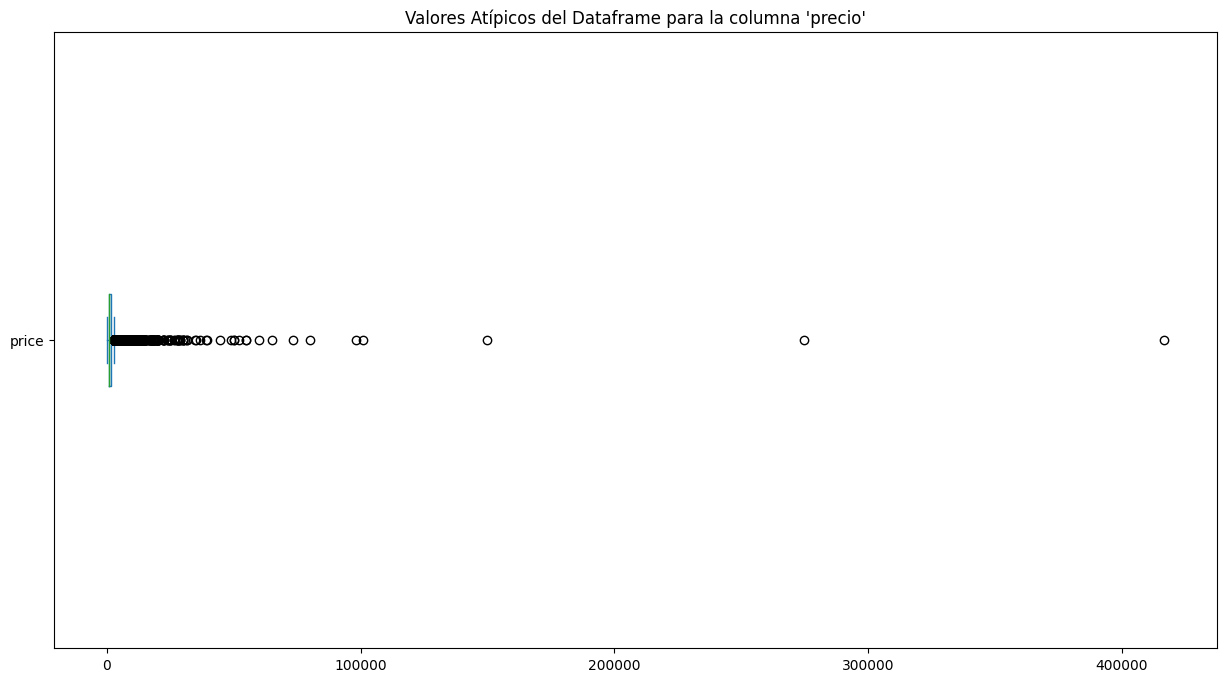

In [11]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfPrices = cuantitativas["price"]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfPrices.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del Dataframe para la columna 'precio'")
plt.show() #Se muestra el diagrama

<Figure size 1500x800 with 0 Axes>

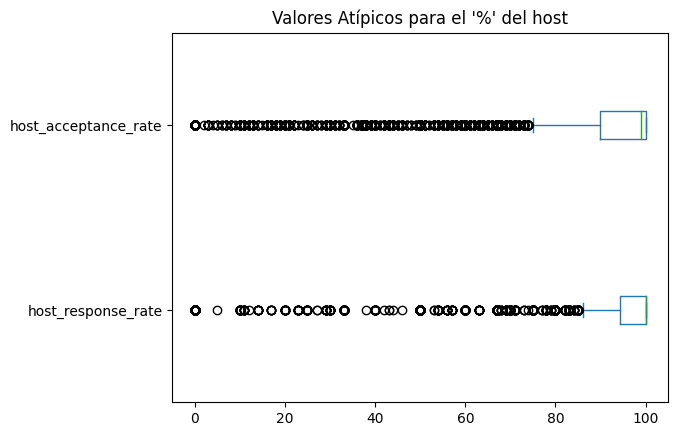

In [12]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfHost = cuantitativas.loc[:, cuantitativas.columns.str.contains("rate")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfHost.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos para el '%' del host")
plt.show() #Se muestra el diagrama

<Figure size 1500x800 with 0 Axes>

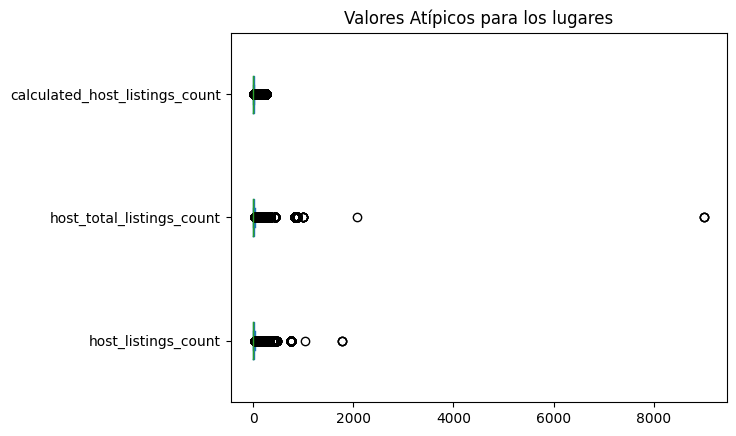

In [13]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfListings = cuantitativas.loc[:, cuantitativas.columns.str.contains("listings")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfListings.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos para los lugares")
plt.show() #Se muestra el diagrama

<Figure size 1500x800 with 0 Axes>

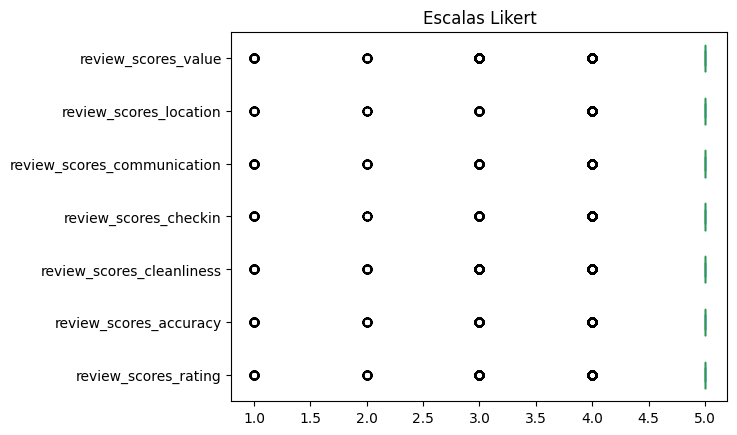

In [14]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfReviews = cuantitativas.loc[:, cuantitativas.columns.str.contains("scores")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfReviews.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Escalas Likert")
plt.show() #Se muestra el diagrama

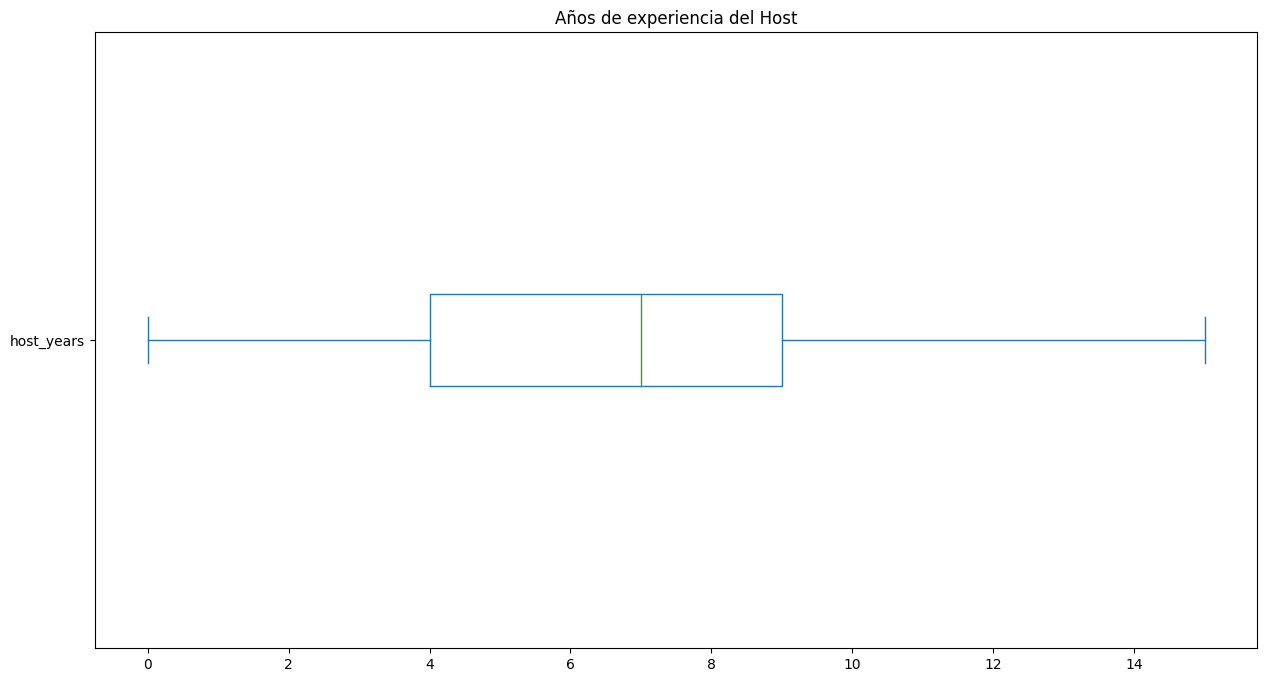

In [15]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfHostYears = cuantitativas["host_years"]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfHostYears.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Años de experiencia del Host")
plt.show() #Se muestra el diagrama

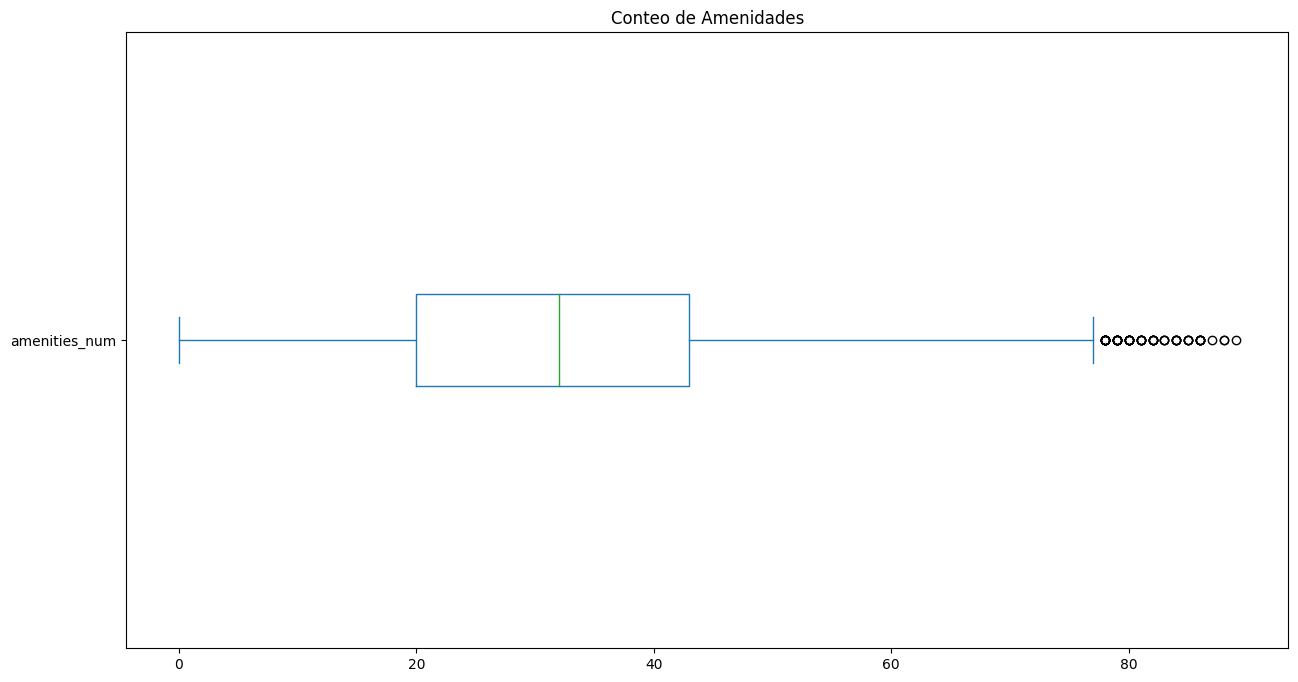

In [16]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfAmenities = cuantitativas["amenities_num"]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfAmenities.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Conteo de Amenidades")
plt.show() #Se muestra el diagrama

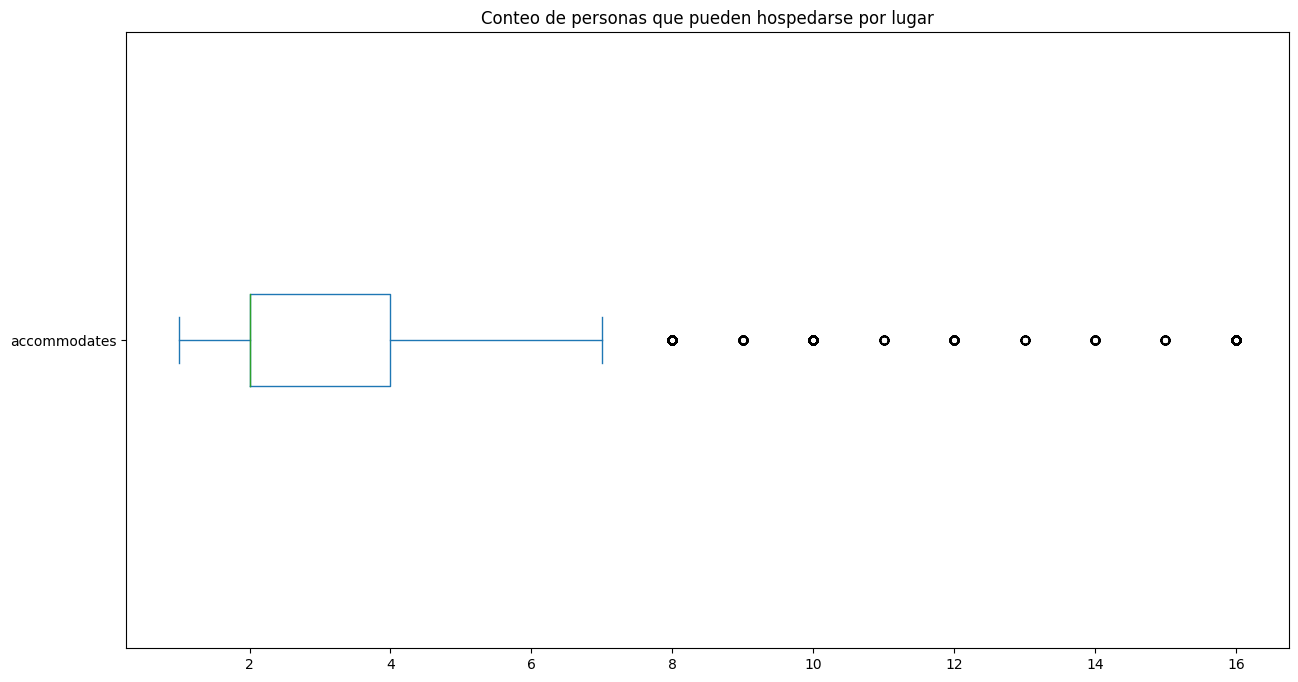

In [17]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfAccommodates = cuantitativas["accommodates"]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfAccommodates.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Conteo de personas que pueden hospedarse por lugar")
plt.show() #Se muestra el diagrama

## Selección de columnas para Outliers

In [18]:
# Dividimos el data frame antes de someterlo a un proceso de outliers con las columnas que sí pasarán por este proceso de control
dfSelect = cuantitativas[["host_total_listings_count","accommodates","minimum_nights_avg_ntm","maximum_nights_avg_ntm","availability_365",
                          "number_of_reviews","reviews_per_month","price","beds","amenities_num"]]
dfSelect

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,6,2,3.0,48.0,262,56,0.41,1652.0,2.0,56
1,1,2,1.0,7.0,363,0,1.13,3663.0,1.0,12
2,17,14,1.0,365.0,364,64,0.42,18000.0,8.0,26
3,4,4,2.0,1125.0,236,161,1.19,814.0,3.0,36
4,4,4,2.0,30.0,361,49,0.32,1923.0,2.0,21
...,...,...,...,...,...,...,...,...,...,...
26531,15,16,2.0,365.0,365,0,1.13,7850.0,7.0,31
26532,51,3,1.0,365.0,363,0,1.13,1478.0,2.0,48
26533,15,3,2.0,365.0,363,0,1.13,936.0,1.0,39
26534,3,4,1.0,365.0,254,0,1.13,768.0,2.0,10


In [19]:
# Eliminar del df cuantitativo, las columnas seleccionadas:
cuantitativas.drop(["host_total_listings_count","accommodates","minimum_nights_avg_ntm","maximum_nights_avg_ntm","availability_365","number_of_reviews","reviews_per_month",
                    "price","beds","amenities_num"], axis = 1, inplace = True)
cuantitativas

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_years,host_verifications_num
0,4796027,2013,100.0,88.0,1.0,3,1,1,19.420630,-99.165860,...,5.0,5.0,5.0,5.0,5.0,5.0,0,3,11.0,2
1,153786,2010,0.0,89.8,0.0,1,1,1,19.382830,-99.271780,...,5.0,5.0,5.0,5.0,5.0,5.0,0,1,14.0,3
2,196253,2010,100.0,92.0,1.0,17,1,1,19.411620,-99.177940,...,5.0,5.0,5.0,5.0,5.0,4.0,0,13,14.0,3
3,4647293,2013,100.0,96.0,1.0,1,1,1,19.439560,-99.172630,...,5.0,5.0,5.0,5.0,4.0,5.0,1,1,11.0,2
4,334451,2011,89.0,62.0,1.0,3,1,1,19.411520,-99.168570,...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,13.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13,1,1,19.404546,-99.168252,...,5.0,5.0,5.0,5.0,5.0,5.0,1,8,10.0,2
26532,7681206,2013,97.0,91.0,0.0,33,1,1,19.420567,-99.166263,...,5.0,5.0,5.0,5.0,5.0,5.0,0,11,11.0,2
26533,50951150,2015,100.0,100.0,2.0,12,1,1,19.408648,-99.170992,...,5.0,5.0,5.0,5.0,5.0,5.0,0,1,9.0,3
26534,147254250,2017,100.0,100.0,1.0,3,1,1,19.412367,-99.166447,...,5.0,5.0,5.0,5.0,5.0,5.0,0,3,7.0,2


##  Eliminación por medio de Desviación Estandar

In [20]:
#Método aplicando desviación Estándar, encuentra los valores extremos
y = dfSelect
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Límite superior permitido:\n\n", Limite_Superior)
print("Límite inferior permitido:\n\n", Limite_Inferior)

Límite superior permitido:

 host_total_listings_count      488.576569
accommodates                    10.367106
minimum_nights_avg_ntm          74.750906
maximum_nights_avg_ntm        2168.602098
availability_365               598.219882
number_of_reviews              262.987146
reviews_per_month                6.940209
price                        13165.195826
beds                             6.769485
amenities_num                   78.431048
dtype: float64
Límite inferior permitido:

 host_total_listings_count     -415.153144
accommodates                    -3.685316
minimum_nights_avg_ntm         -65.895607
maximum_nights_avg_ntm        -642.466253
availability_365              -149.840774
number_of_reviews             -176.087990
reviews_per_month               -3.707372
price                       -10328.386963
beds                            -3.209340
amenities_num                  -15.175245
dtype: float64


In [21]:
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNull = dfSelect[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNull

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,6.0,2.0,3.0,48.0,262,56.0,0.41,1652.0,2.0,56.0
1,1.0,2.0,1.0,7.0,363,0.0,1.13,3663.0,1.0,12.0
2,17.0,NaN,1.0,365.0,364,64.0,0.42,NaN,NaN,26.0
3,4.0,4.0,2.0,1125.0,236,161.0,1.19,814.0,3.0,36.0
4,4.0,4.0,2.0,30.0,361,49.0,0.32,1923.0,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...
26531,15.0,NaN,2.0,365.0,365,0.0,1.13,7850.0,NaN,31.0
26532,51.0,3.0,1.0,365.0,363,0.0,1.13,1478.0,2.0,48.0
26533,15.0,3.0,2.0,365.0,363,0.0,1.13,936.0,1.0,39.0
26534,3.0,4.0,1.0,365.0,254,0.0,1.13,768.0,2.0,10.0


In [22]:
# Contar los outliers utilizando el método de outliers por desviación estándar
OutliersNull.isnull().sum()

,0
host_total_listings_count,415
accommodates,500
minimum_nights_avg_ntm,180
maximum_nights_avg_ntm,10
availability_365,0
number_of_reviews,611
reviews_per_month,393
price,130
beds,433
amenities_num,52


In [23]:
# Reemplazar valores atípicos (nulos) del dataframe con el promedio
# Realizamos una copia del dataframe
dfCleanDesv = OutliersNull.copy()
dfCleanDesv = dfCleanDesv.fillna(round(OutliersNull.mean(),0))
dfCleanDesv

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,6.0,2.0,3.0,48.0,262,56.0,0.41,1652.0,2.0,56.0
1,1.0,2.0,1.0,7.0,363,0.0,1.13,3663.0,1.0,12.0
2,17.0,3.0,1.0,365.0,364,64.0,0.42,1275.0,2.0,26.0
3,4.0,4.0,2.0,1125.0,236,161.0,1.19,814.0,3.0,36.0
4,4.0,4.0,2.0,30.0,361,49.0,0.32,1923.0,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...
26531,15.0,3.0,2.0,365.0,365,0.0,1.13,7850.0,2.0,31.0
26532,51.0,3.0,1.0,365.0,363,0.0,1.13,1478.0,2.0,48.0
26533,15.0,3.0,2.0,365.0,363,0.0,1.13,936.0,1.0,39.0
26534,3.0,4.0,1.0,365.0,254,0.0,1.13,768.0,2.0,10.0


In [24]:
# Corroboramos los valores nulos en el data clean
dfCleanDesv.isnull().sum().sum()

0

## Eliminación de outliers con el Método Intercuartílico

In [25]:
# Método aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y = dfSelect
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

LimiteSuperiorIqr = percentile75 + 1.5*iqr
LimiteInferiorIqr = percentile25 + 1.5*iqr

print("Límite superior permitido:\n\n", LimiteSuperiorIqr)
print("Límite inferior permitido:\n\n", LimiteInferiorIqr)

Límite superior permitido:

 host_total_listings_count      39.50
accommodates                    7.00
minimum_nights_avg_ntm          4.50
maximum_nights_avg_ntm       2265.00
availability_365              688.50
number_of_reviews             128.00
reviews_per_month               4.57
price                        2645.50
beds                            3.50
amenities_num                  77.50
dtype: float64
Límite inferior permitido:

 host_total_listings_count      24.50
accommodates                    5.00
minimum_nights_avg_ntm          3.10
maximum_nights_avg_ntm       1505.00
availability_365              459.50
number_of_reviews              78.00
reviews_per_month               2.95
price                        1848.50
beds                            2.50
amenities_num                  54.50
dtype: float64


In [26]:
# Obtener los valores limpios del dataframe
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNullIqr = dfSelect[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNullIqr

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,6.0,2.0,3.0,48.0,262,56.0,0.41,1652.0,2.0,56.0
1,1.0,2.0,1.0,7.0,363,0.0,1.13,3663.0,1.0,12.0
2,17.0,NaN,1.0,365.0,364,64.0,0.42,NaN,NaN,26.0
3,4.0,4.0,2.0,1125.0,236,161.0,1.19,814.0,3.0,36.0
4,4.0,4.0,2.0,30.0,361,49.0,0.32,1923.0,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...
26531,15.0,NaN,2.0,365.0,365,0.0,1.13,7850.0,NaN,31.0
26532,51.0,3.0,1.0,365.0,363,0.0,1.13,1478.0,2.0,48.0
26533,15.0,3.0,2.0,365.0,363,0.0,1.13,936.0,1.0,39.0
26534,3.0,4.0,1.0,365.0,254,0.0,1.13,768.0,2.0,10.0


In [27]:
# Contar los outliers
OutliersNullIqr.isnull().sum()

,0
host_total_listings_count,415
accommodates,500
minimum_nights_avg_ntm,180
maximum_nights_avg_ntm,10
availability_365,0
number_of_reviews,611
reviews_per_month,393
price,130
beds,433
amenities_num,52


In [28]:
# Reemplazar valores atípicos (nulos) del dataframe con el promedio
# Realizamos una copia del dataframe
dfCleanIqr = OutliersNullIqr.copy()
dfCleanIqr = dfCleanIqr.fillna(round(OutliersNullIqr.mean(),0))
dfCleanIqr

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,6.0,2.0,3.0,48.0,262,56.0,0.41,1652.0,2.0,56.0
1,1.0,2.0,1.0,7.0,363,0.0,1.13,3663.0,1.0,12.0
2,17.0,3.0,1.0,365.0,364,64.0,0.42,1275.0,2.0,26.0
3,4.0,4.0,2.0,1125.0,236,161.0,1.19,814.0,3.0,36.0
4,4.0,4.0,2.0,30.0,361,49.0,0.32,1923.0,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...
26531,15.0,3.0,2.0,365.0,365,0.0,1.13,7850.0,2.0,31.0
26532,51.0,3.0,1.0,365.0,363,0.0,1.13,1478.0,2.0,48.0
26533,15.0,3.0,2.0,365.0,363,0.0,1.13,936.0,1.0,39.0
26534,3.0,4.0,1.0,365.0,254,0.0,1.13,768.0,2.0,10.0


In [29]:
# Comprobamos que hemos reemplazado los datos correctamente
dfCleanIqr.isnull().sum().sum()

0

In [30]:
# Unimos las columnas cualitativas y las cuantitativas procesadas de outliers por método de desviación estándar
dfLimpioIqr = pd.concat([cuantitativas, dfCleanIqr], axis=1)
dfLimpio = pd.concat([cualitativas, dfLimpioIqr], axis=1)
dfLimpio

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,6.0,2.0,3.0,48.0,262,56.0,0.41,1652.0,2.0,56.0
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,1.0,2.0,1.0,7.0,363,0.0,1.13,3663.0,1.0,12.0
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,17.0,3.0,1.0,365.0,364,64.0,0.42,1275.0,2.0,26.0
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,4.0,4.0,2.0,1125.0,236,161.0,1.19,814.0,3.0,36.0
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,4.0,4.0,2.0,30.0,361,49.0,0.32,1923.0,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,4.5 baths,"[""Wifi"", ""Smoke alarm"", ""Essentials"", ""Room-da...",...,15.0,3.0,2.0,365.0,365,0.0,1.13,7850.0,2.0,31.0
26532,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Outdoor furniture"", ""Portable fans"",...",...,51.0,3.0,1.0,365.0,363,0.0,1.13,1478.0,2.0,48.0
26533,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Smoke alarm"", ""Wine glasses"", ""Essen...",...,15.0,3.0,2.0,365.0,363,0.0,1.13,936.0,1.0,39.0
26534,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,1.5 baths,"[""Washer"", ""Wifi"", ""Exterior security cameras ...",...,3.0,4.0,1.0,365.0,254,0.0,1.13,768.0,2.0,10.0


In [31]:
df

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,amenities_num,host_verifications_num
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,5.0,5.0,5.0,5.0,0,3,0.41,11.0,56,2
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,5.0,5.0,5.0,5.0,0,1,1.13,14.0,12,3
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,5.0,5.0,5.0,4.0,0,13,0.42,14.0,26,3
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,5.0,5.0,4.0,5.0,1,1,1.19,11.0,36,2
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,5.0,5.0,5.0,5.0,0,2,0.32,13.0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,4.5 baths,"[""Wifi"", ""Smoke alarm"", ""Essentials"", ""Room-da...",...,5.0,5.0,5.0,5.0,1,8,1.13,10.0,31,2
26532,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Outdoor furniture"", ""Portable fans"",...",...,5.0,5.0,5.0,5.0,0,11,1.13,11.0,48,2
26533,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Smoke alarm"", ""Wine glasses"", ""Essen...",...,5.0,5.0,5.0,5.0,0,1,1.13,9.0,39,3
26534,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,1.5 baths,"[""Washer"", ""Wifi"", ""Exterior security cameras ...",...,5.0,5.0,5.0,5.0,0,3,1.13,7.0,10,2


## Preprocesamiento de Extracción

In [32]:
# Asignamos categorías a las columnas de tipo texto con valores numéricos usando la libreria de sklearn
labels = LabelEncoder()
# Convertir la columna de texto a valores numéricos (Categorizar con números)
dfLimpio['room_type_num'] = labels.fit_transform(dfLimpio['room_type'])
dfLimpio['neighbourhood_cleansed_num'] = labels.fit_transform(dfLimpio['neighbourhood_cleansed'])
dfLimpio['host_response_time_num'] = labels.fit_transform(dfLimpio['host_response_time'])

In [33]:
# Obtenemos categorías para bathrooms_text:
dfLimpio['bathroom_text_clean'] = dfLimpio['bathrooms_text'].str.replace(r'^\d*\.?\d*\s?', '', regex=True).str.strip()
dfLimpio['bathroom_text_clean'] = dfLimpio['bathroom_text_clean'].str.replace("baths","bath")
dfLimpio['bathroom_text_clean'] = dfLimpio['bathroom_text_clean'].str.replace("shared baths","shared bath")
dfLimpio['bathroom_text_clean'].value_counts()
# Las volvemos numéricas:
dfLimpio['bathroom_text_num'] = labels.fit_transform(dfLimpio['bathroom_text_clean'])
dfLimpio['bathroom_text_num'].value_counts()

,count
bathroom_text_num,
3,19752
5,3665
4,3033
0,44
6,25
2,14
1,3


In [34]:
dfLimpio['neighbourhood_cleansed'].value_counts().index

Index(['Cuauhtémoc', 'Miguel Hidalgo', 'Benito Juárez', 'Coyoacán',
       'Álvaro Obregón', 'Tlalpan', 'Venustiano Carranza', 'Gustavo A. Madero',
       'Cuajimalpa de Morelos', 'Iztacalco', 'Azcapotzalco', 'Iztapalapa',
       'Xochimilco', 'La Magdalena Contreras', 'Tláhuac', 'Milpa Alta'],
      dtype='object', name='neighbourhood_cleansed')

In [35]:
# Usamos np.where() para clasificar los vecindarios
dfLimpio['neighbourhood_Category'] = np.where(dfLimpio['neighbourhood_cleansed'].isin([
    'Cuauhtémoc', 'Venustiano Carranza', 'Gustavo A. Madero']), 'Norte',
    np.where(dfLimpio['neighbourhood_cleansed'].isin([
        'Coyoacán', 'Tlalpan', 'Xochimilco', 'Tláhuac', 'Milpa Alta']), 'Sur',
        np.where(dfLimpio['neighbourhood_cleansed'].isin([
            'Iztacalco', 'Iztapalapa']), 'Este',
            np.where(dfLimpio['neighbourhood_cleansed'].isin([
                'Miguel Hidalgo', 'Benito Juárez', 'Álvaro Obregón', 'Cuajimalpa de Morelos', 'Azcapotzalco', 'La Magdalena Contreras']), 'Oeste',
                'Otra'))))

# Mostrar el DataFrame resultante
dfLimpio[['neighbourhood_cleansed', 'neighbourhood_Category']]


,neighbourhood_cleansed,neighbourhood_Category
0,Cuauhtémoc,Norte
1,Cuajimalpa de Morelos,Oeste
2,Cuauhtémoc,Norte
3,Miguel Hidalgo,Oeste
4,Cuauhtémoc,Norte
...,...,...
26531,Cuauhtémoc,Norte
26532,Cuauhtémoc,Norte
26533,Cuauhtémoc,Norte
26534,Cuauhtémoc,Norte


In [36]:
dfLimpio['neighbourhood_Category'].value_counts()

,count
neighbourhood_Category,
Norte,13439
Oeste,9718
Sur,2731
Este,648


In [37]:
dfLimpio.isnull().sum().sum()

0

## Categorización de variables numericas
**Con la regla de Sturges**

*AMENITIES*

In [38]:
#Calculamos el número total de la población "n"
dfLimpio['amenities_num'].info()
n = len(dfLimpio['amenities_num'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["amenities_num"].max()
Min = dfLimpio["amenities_num"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

#Ddado que los extremos de los límites más altos son en Ottawa, se obtará por manejar esa escala

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

intervalos = [ 0,  7, 14, 22, 29, 36, 43, 50, 57, 64, 72, 79, 86]

# Creamos las categorías
categorias = [ '(0 - 7) Básico', '(8 - 14) Limitado', '(15 - 22) Estándar', '(23 - 29) Completo', '(30 - 36) Amplio', '(37 - 43) Enriquecido', '(44 - 50) Superior', '(51 - 57) Extendido', '(58 - 64) Excepcional', '(65 - 72) Muy completo', '(73 - 79) Premium', '(80 - 86) De lujo' ]

# Finalmente creamos las categorías en la columna numérica
dfLimpio['amenitiesCat'] = pd.cut(x = dfLimpio['amenities_num'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['amenitiesCat'].value_counts()
dfLimpio['amenitiesCat'].isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: amenities_num
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*HOST TOTAL LISTINGS COUNT*

In [39]:
#Calculamos el número total de la población "n"
dfLimpio['host_total_listings_count'].info()
n = len(dfLimpio['host_total_listings_count'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["host_total_listings_count"].max()
Min = dfLimpio["host_total_listings_count"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

#Categorización de variables
intervalos = np.linspace(Min, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

categorias = ['Novato en hospedaje (1-40)','Propietario en crecimiento (41-80)','Operador experimentado (81-120)','Experto en hospedaje (121-160)','Gran operador (161-200)','Operador a gran escala (201-241)',
              'Operador regional consolidado (242-281)',' Operador nacional (282-321)','Operador de gran volumen (322-361)', 'Operador de alto impacto (362-401)', 'Gigante de la industria de hospedaje (402-442)'  ]

# Finalmente creamos las categorías en la columna numérica

dfLimpio['hostTotalListingsCat'] = pd.cut(x = dfLimpio['host_total_listings_count'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['hostTotalListingsCat'].value_counts()
dfLimpio['hostTotalListingsCat'].isnull().sum()


<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*ACCOMODATES*

In [40]:
#Calculamos el número total de la población "n"
dfLimpio['accommodates'].info()
n = len(dfLimpio['accommodates'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["accommodates"].max()
Min = dfLimpio["accommodates"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

#Dado que los extremos de los límites más altos son en Ottawa, se obtará por manejar esa escala

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

#Categorización de variables
intervalos = [ 1,  2,  4,  6,  8, 10, 12]
categorias = [
    '(1 - 2) Pareja',
    '(2 - 4) Familiar pequeño',
    '(4 - 6) Familiar mediano',
    '(6 - 8) Familiar grande',
    '(8 - 10) Grupo',
    '(10 - 12) Grupo grande'
]

dfLimpio['accommodatesCat'] = pd.cut(x = dfLimpio['accommodates'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['accommodatesCat'].value_counts()
dfLimpio['accommodatesCat'].isnull().sum()


<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*MINIMUM NIGHTS AVG NTM*

In [41]:
#Calculamos el número total de la población "n"
dfLimpio['minimum_nights_avg_ntm'].info()
n = len(dfLimpio['minimum_nights_avg_ntm'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["minimum_nights_avg_ntm"].max()
Min = dfLimpio["minimum_nights_avg_ntm"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"

ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

intervalos = [1,  9, 17, 25, 33, 41, 50, 58, 66, 74, 82, 90]

# Creamos la categoría
categorias = [
    '(1 - 9) Muy corto plazo',
    '(9 - 17) Corto plazo',
    '(17 - 25) Plazo intermedio',
    '(25 - 33) Plazo moderado',
    '(33 - 41) Plazo extendido',
    '(41 - 50) Largo plazo',
    '(50 - 58) Muy largo plazo',
    '(58 - 66) Prolongado',
    '(66 - 74) Extensivo',
    '(74 - 82) Larga temporada',
    '(82 - 90) Temporada completa'
]

# Finalmente creamos las categorías en la columna numérica
dfLimpio['minimumNightsCategory'] = pd.cut(x = dfLimpio['minimum_nights_avg_ntm'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['minimumNightsCategory'].value_counts()
dfLimpio['minimumNightsCategory'].isnull().sum()


<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: minimum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*MAXIMUM NIGHTS AVG NTM*

In [42]:
#Calculamos el número total de la población "n"
dfLimpio['maximum_nights_avg_ntm'].info()
n = len(dfLimpio['maximum_nights_avg_ntm'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["maximum_nights_avg_ntm"].max()
Min = dfLimpio["maximum_nights_avg_ntm"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i
intervalos = np.linspace(Min, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

# Creamos las categorias
categorias = [
    'Muy bajo (1-167)', 'Bajo (168-333)', 'Moderadamente bajo (334-498)', 'Medio bajo (499-664)',
    'Moderado (665-830)', 'Moderadamente alto (831-996)', 'Medio alto (997-1162)',
    'Alto (1163-1328)', 'Muy alto (1329-1493)', 'Extremadamente alto (1494-1659)',
    'Maximo (1660-1825)'
]


# Finalmente creamos las categorías en la columna numérica
dfLimpio['maximumNightsCategory'] = pd.cut(x = dfLimpio['maximum_nights_avg_ntm'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['maximumNightsCategory'].value_counts()
dfLimpio['maximumNightsCategory'].isnull().sum()




<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*AVAILABILITY *

In [43]:
#Calculamos el número total de la población "n"
dfLimpio['availability_365'].info()
n = len(dfLimpio['availability_365'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["availability_365"].max()
Min = dfLimpio["availability_365"].min()
Limites = [Min, Max]
Limites


# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

intervalos = [0,  30,  61,  91, 122, 152, 182, 213, 243, 274, 304, 335, 365]
categorias = [
    '(0 - 30) Muy baja disponibilidad',
    '(30 - 61) Baja disponibilidad',
    '(61 - 91) Disponibilidad sencilla',
    '(91 - 122) Disponibilidad moderada',
    '(122 - 152) Disponibilidad regular',
    '(152 - 182) Disponibilidad alta',
    '(182 - 213) Muy alta disponibilidad',
    '(213 - 243) Extensa disponibilidad',
    '(243 - 274) Casi total disponibilidad',
    '(274 - 304) Disponibilidad casi completa',
    '(304 - 335) Total disponibilidad',
    '(335 - 365) Año Completo'
]

# Finalmente creamos las categorías en la columna numérica
dfLimpio['availabilityYearCat'] = pd.cut(x = dfLimpio['availability_365'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['availabilityYearCat'].value_counts()
dfLimpio['availabilityYearCat'].isnull().sum()


<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
26536 non-null  int64
dtypes: int64(1)
memory usage: 207.4 KB


0

NUMBER OF REVIEWS

In [44]:
#Calculamos el número total de la población "n"
dfLimpio['number_of_reviews'].info()
n = len(dfLimpio['number_of_reviews'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["number_of_reviews"].max()
Min = dfLimpio["number_of_reviews"].min()
Limites = [Min, Max]
Limites


# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

intervalos = [ 0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275]
categorias = [
    '(0 - 25) Muy pocas reseñas',
    '(25 - 50) Pocas reseñas',
    '(50 - 75) Reseñas limitadas',
    '(75 - 100) Reseñas moderadas',
    '(100 - 125) Buen número de reseñas',
    '(125 - 150) Reseñas sólidas',
    '(150 - 175) Muchas reseñas',
    '(175 - 200) Con mucho flujo',
    '(200 - 225) Muy comentado',
    '(225 - 250) Popular',
    '(250 - 275) Muy popular'
]

# Finalmente creamos las categorías en la columna numérica
dfLimpio['reviewsNumCat'] = pd.cut(x = dfLimpio['number_of_reviews'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['reviewsNumCat'].value_counts()
dfLimpio['reviewsNumCat'].isnull().sum()


<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*HOST YEARS*

In [45]:
#Calculamos el número total de la población "n"
dfLimpio['host_years'].info()
n = len(dfLimpio['host_years'])

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["host_years"].max()
Min = dfLimpio["host_years"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

intervalos = [ 0, 4, 8, 12, 16]
categorias = ['Principiante (0-3 años)','Intermedio (4-7 años)','Profesional (8-11 años)','Experimentado (12-16 años)']

# Finalmente creamos las categorías en la columna numérica
dfLimpio['hostYearsCat'] = pd.cut(x = dfLimpio['host_years'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['hostYearsCat'].value_counts()
dfLimpio['hostYearsCat'].isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_years
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*PRICE*

In [46]:
dfLimpio['price'].info()
n - len(dfLimpio['host_years'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["price"].max()
Min = dfLimpio["price"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

#Dado que los extremos de los límites más altos son en Ottawa, se obtará por manejar esa escala

# Calculamos el ancho del intervalo i
i = R/ni
i = round(i,0)
i

#Categorización de variables
intervalos = np.linspace(Min, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

intervalos = [105,  1276,  2448,  3619,  4791,  5962,  7134,  8305,  9477, 10648, 11820, 12991]
categorias = [
    'Económico (105-1276)', 'Accesible (1277-2448)', 'Moderado (2449-3619)',
    'Medio (3620-4791)', 'Medio-alto (4792-5962)', 'Alto (5963-7134)',
    'Premium (7135-8305)', 'Lujo (8306-9477)', 'Exclusivo (9478-10648)',
    'Élite (10649-11820)', 'Alto nivel (11821-12991)'
]


# Finalmente creamos las categorías en la columna numérica
dfLimpio['priceMexCat'] = pd.cut(x = dfLimpio['price'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['priceMexCat'].value_counts()
dfLimpio['priceMexCat'].isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: price
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*HOST RESPONSE RATE*

In [47]:

#Calculamos el número total de la población "n"
dfLimpio['host_response_rate'].info()
n = len(dfLimpio['host_response_rate'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["host_response_rate"].max()
Min = dfLimpio["host_response_rate"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [  0,   9,  18,  27,  36,  45,  55,  64,  73,  82,  91, 100]

categorias = [
    '(0 - 9) Muy baja tasa de respuesta',
    '(9 - 18) Baja tasa de respuesta',
    '(18 - 27) Tasa de respuesta limitada',
    '(27 - 36) Tasa de respuesta moderada',
    '(36 - 45) Tasa de respuesta adecuada',
    '(45 - 55) Tasa de respuesta buena',
    '(55 - 64) Alta tasa de respuesta',
    '(64 - 73) Muy buena tasa de respuesta',
    '(73 - 82) Excelente tasa de respuesta',
    '(82 - 91) Tasa de respuesta sobresaliente',
    '(91 - 100) Tasa de respuesta perfecta'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['hostResponseCat'] = pd.cut(x = dfLimpio['host_response_rate'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['hostResponseCat'].value_counts()
dfLimpio['hostResponseCat'].isnull().sum()


<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*HOST ACCEPTANCE RATE*

In [48]:

#Calculamos el número total de la población "n"
dfLimpio['host_acceptance_rate'].info()
n = len(dfLimpio['host_acceptance_rate'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["host_acceptance_rate"].max()
Min = dfLimpio["host_acceptance_rate"].min()
Limites = [Min, Max]
Limites
# Limites de CDMX: [0, 100]
# Límites de Seattle: [0, 100]
# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [  0,   9,  18,  27,  36,  45,  55,  64,  73,  82,  91,
       100]

# Creamos las categorías
categorias = [
    '(0 - 9%) Muy Malo',
    '(10 - 18%) Malo',
    '(19 - 27%) Muy Bajo',
    '(28 - 36%) Bajo',
    '(37 - 45%) Medio',
    '(46 - 55%) Mejorable',
    '(56 - 64%) Aceptable',
    '(65 - 73%) Bueno',
    '(74 - 82%) Muy bueno',
    '(83 - 91%) Alto',
    '(92 - 100%) Excelente'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['hostAcceptanceCat'] = pd.cut(x = dfLimpio['host_acceptance_rate'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['hostAcceptanceCat'].value_counts()
dfLimpio['hostAcceptanceCat'].isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


0

*HOST VERIFICATIONS NUM *

In [49]:

#Calculamos el número total de la población "n"
dfLimpio['host_verifications_num'].info()
n = len(dfLimpio['host_verifications_num'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["host_verifications_num"].max()
Min = dfLimpio["host_verifications_num"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [0,1,2,3]

# Creamos las categorías
categorias = [
    '(0 - 1) Verificación básica',
    '(2) Verificación moderada',
    '(3) Verificación completa'
]

# Finalmente creamos las categorías en la columna numérica
dfLimpio['hostVerifCat'] = pd.cut(x = dfLimpio['host_verifications_num'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['hostVerifCat'].value_counts()
dfLimpio['hostVerifCat'].isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_verifications_num
Non-Null Count  Dtype
--------------  -----
26536 non-null  int64
dtypes: int64(1)
memory usage: 207.4 KB


0

In [50]:
# La columna de host_response_time ya fue categorizada previamente
dfLimpio[["host_response_time","host_response_time_num"]].value_counts()


,,count
host_response_time,host_response_time_num,
within an hour,3,22598
within a few hours,2,2016
within a day,1,1098
a few days or more,0,824


In [51]:
# La columna de bathroom_text ya fue categorizada previamente
dfLimpio[["bathroom_text_clean","bathroom_text_num"]].value_counts()

,,count
bathroom_text_clean,bathroom_text_num,
bath,3,19752
shared bath,5,3665
private bath,4,3033
Half-bath,0,44
within an hour,6,25
Shared half-bath,2,14
Private half-bath,1,3


In [52]:
labels = LabelEncoder()
dfLimpio['neighbourhood_Category_num'] = labels.fit_transform(dfLimpio['neighbourhood_Category'])

In [53]:
# La columna de neighbourhood_cleansed ya fue categorizada previamente
dfLimpio[["neighbourhood_Category","neighbourhood_Category_num"]].value_counts()

,,count
neighbourhood_Category,neighbourhood_Category_num,
Norte,1,13439
Oeste,2,9718
Sur,3,2731
Este,0,648


In [54]:
#Calculamos el número total de la población "n"
dfLimpio['beds'].info()
n = len(dfLimpio['beds'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["beds"].max()
Min = dfLimpio["beds"].min()
Limites = [Min, Max]
Limites


# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [0,1,3,5,6]

# Creamos las categorías
categorias = [
    '(0 - 1) Una cama',
    '(2) Pocas camas',
    '(3 - 5) Camas múltiples',
    '(5 - 6) Muchas camas'
]
# Finalmente creamos las categorías en la columna numérica
# Finalmente creamos las categorías en la columna numérica
dfLimpio['bedsCategory'] = pd.cut(x = dfLimpio['beds'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['bedsCategory'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


,count
bedsCategory,
(0 - 1) Una cama,15213
(2) Pocas camas,9403
(3 - 5) Camas múltiples,1694
(5 - 6) Muchas camas,226


In [55]:
#Calculamos el número total de la población "n"
dfLimpio['reviews_per_month'].info()
n = len(dfLimpio['reviews_per_month'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["reviews_per_month"].max()
Min = dfLimpio["reviews_per_month"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [0,1,3,5,7,10]

# Creamos las categorías
categorias = [
    '(0) Sin reseñas',
    '(1) Reseña mensual mínima',
    '(2 - 5) Reseñas mensuales moderadas',
    '(5 - 7) Buen número de reseñas mensuales',
    '(7 - 10) Alta frecuencia de reseñas'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['reviewsMonthCat'] = pd.cut(x = dfLimpio['reviews_per_month'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['reviewsMonthCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


,count
reviewsMonthCat,
(1) Reseña mensual mínima,11998
(0) Sin reseñas,10992
(2 - 5) Reseñas mensuales moderadas,2851
(5 - 7) Buen número de reseñas mensuales,695
(7 - 10) Alta frecuencia de reseñas,0


ESCALA LIKERT

In [56]:
#Calculamos el número total de la población "n"
dfLimpio['review_scores_value'].info()
n = len(dfLimpio['review_scores_value'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["review_scores_value"].max()
Min = dfLimpio["review_scores_value"].min()
Limites = [Min, Max]
Limites

intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['reviewScoresCat'] = pd.cut(x = dfLimpio['review_scores_value'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['reviewScoresCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


,count
reviewScoresCat,
(5) Muy satisfecho,23291
(4) Satisfecho,2963
(3) Neutral,180
(1 - 2) Insatisfecho,102


In [57]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dfLimpio['review_scores_location'].info()
n = len(dfLimpio['review_scores_location'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["review_scores_location"].max()
Min = dfLimpio["review_scores_location"].min()
Limites = [Min, Max]
Limites

intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['reviewLocationCat'] = pd.cut(x = dfLimpio['review_scores_location'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['reviewLocationCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


,count
reviewLocationCat,
(5) Muy satisfecho,24965
(4) Satisfecho,1435
(3) Neutral,74
(1 - 2) Insatisfecho,62


In [58]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dfLimpio['review_scores_rating'].info()
n = len(dfLimpio['review_scores_rating'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["review_scores_rating"].max()
Min = dfLimpio["review_scores_rating"].min()
Limites = [Min, Max]
Limites

intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['reviewRatingCat'] = pd.cut(x = dfLimpio['review_scores_rating'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['reviewRatingCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: review_scores_rating
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


,count
reviewRatingCat,
(5) Muy satisfecho,23830
(4) Satisfecho,2461
(3) Neutral,144
(1 - 2) Insatisfecho,101


In [59]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dfLimpio['review_scores_cleanliness'].info()
n = len(dfLimpio['review_scores_cleanliness'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["review_scores_cleanliness"].max()
Min = dfLimpio["review_scores_cleanliness"].min()
Limites = [Min, Max]
Limites

intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['reviewCleanCat'] = pd.cut(x = dfLimpio['review_scores_cleanliness'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['reviewCleanCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: review_scores_cleanliness
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


,count
reviewCleanCat,
(5) Muy satisfecho,23723
(4) Satisfecho,2553
(3) Neutral,161
(1 - 2) Insatisfecho,99


In [60]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dfLimpio['review_scores_communication'].info()
n = len(dfLimpio['review_scores_communication'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dfLimpio["review_scores_communication"].max()
Min = dfLimpio["review_scores_communication"].min()
Limites = [Min, Max]
Limites

intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dfLimpio['reviewCommunicationCat'] = pd.cut(x = dfLimpio['review_scores_communication'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['reviewCommunicationCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


,count
reviewCommunicationCat,
(5) Muy satisfecho,24882
(4) Satisfecho,1446
(3) Neutral,115
(1 - 2) Insatisfecho,93


In [61]:
dfLimpio

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,4.5 baths,"[""Wifi"", ""Smoke alarm"", ""Essentials"", ""Room-da...",...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26532,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Outdoor furniture"", ""Portable fans"",...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26533,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Smoke alarm"", ""Wine glasses"", ""Essen...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26534,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,1.5 baths,"[""Washer"", ""Wifi"", ""Exterior security cameras ...",...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [62]:
dfLimpio.isnull().sum().sum()

0

In [63]:
dfLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   last_scraped                    26536 non-null  object  
 1   source                          26536 non-null  object  
 2   host_name                       26536 non-null  object  
 3   host_response_time              26536 non-null  object  
 4   host_verifications              26536 non-null  object  
 5   neighbourhood_cleansed          26536 non-null  object  
 6   property_type                   26536 non-null  object  
 7   room_type                       26536 non-null  object  
 8   bathrooms_text                  26536 non-null  object  
 9   amenities                       26536 non-null  object  
 10  calendar_last_scraped           26536 non-null  object  
 11  host_id                         26536 non-null  int64   
 12  host_since        

In [64]:
#Convertir DataFrame a CSV
dfLimpio.to_csv("Mexico_Outliers_y_Categorización.csv")

In [65]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Mexico_Outliers_y_Categorización.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>